In [1]:
# OASIS INFOBYTE INTERNSHIP
# Task_NO-5. SALES PRICE PREDICTION
# NAME - ATIF SHIKALGAR
# INTERNSHIP - DATA SCIENCE 

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'H:\Atif lenovo\SOFTWARES\ANACONDA\Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
df.shape


(200, 5)

In [6]:
df.columns.values.tolist()
     

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
     

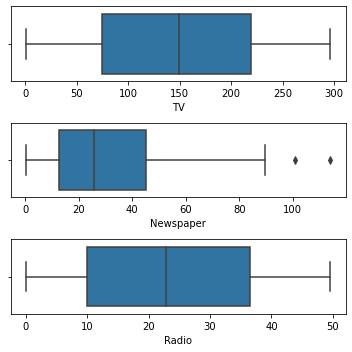

In [11]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

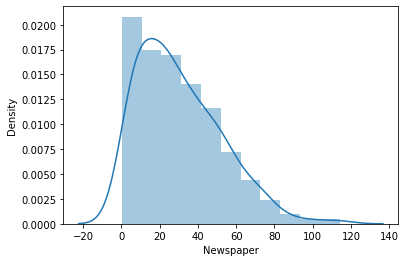

In [12]:
sns.distplot(df['Newspaper'])

In [13]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)
     

In [14]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [15]:
data = df.copy()

In [16]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<AxesSubplot:xlabel='Newspaper'>

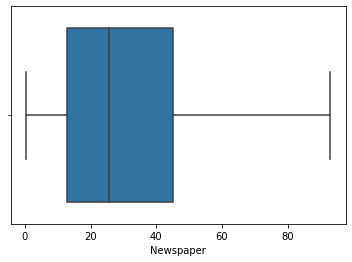

In [17]:
sns.boxplot(data['Newspaper'])

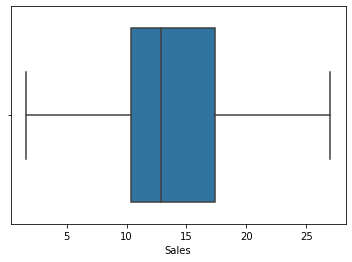

In [18]:
sns.boxplot(data['Sales']);

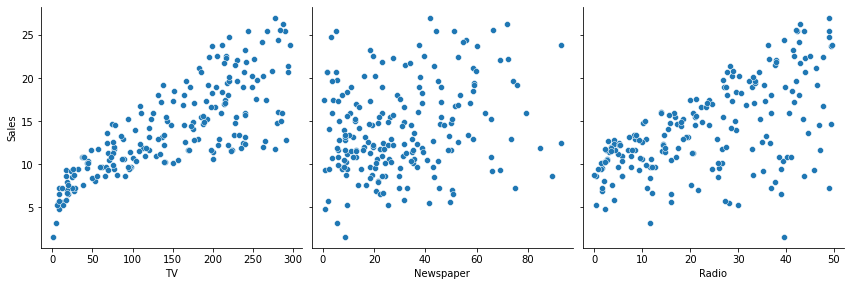

In [19]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()
     

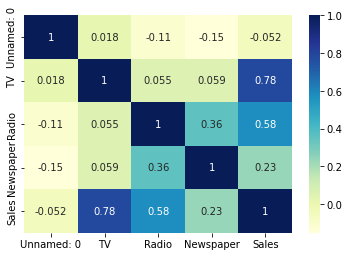

In [20]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [21]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [22]:
print(important_features)

['TV', 'Radio', 'Sales']


In [23]:
X = data['TV']
y = data['Sales']

In [24]:
X = X.values.reshape(-1,1)

In [25]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [26]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [27]:
print(X.shape,y.shape)

(200, 1) (200,)


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [29]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [30]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [31]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [32]:
knn_train_pred = knn.predict(X_train)

In [33]:
knn_test_pred = knn.predict(X_test)


In [34]:
print(knn_train_pred, knn_test_pred)

[19.98 17.64 13.12 23.18 16.08 13.72 17.78 11.52 13.56 12.2  11.2  12.04
 17.88  6.06 19.16 15.12 10.44  7.28 12.34  9.44 12.1   6.68 12.72 15.86
 19.36 12.74 15.06 12.1  18.3  12.1  20.86 19.36 20.86  6.06 12.34 15.06
 18.3  16.4  10.44 10.36 18.78  6.06 17.06 13.52 17.54 11.32 19.98 10.84
 14.08 11.92 18.3  16.64 15.06 16.52  7.88 15.1  15.82 14.08 19.16 14.68
 19.98 14.02 17.94 13.72 15.1   6.68 10.36 11.28 17.1  15.18 16.2  13.72
  6.06 14.44 23.3   7.88 23.18 11.28 17.24 17.6  10.44 19.98 19.98 18.4
  7.88 16.64 14.44 18.08 20.64 12.9  11.2  12.1  18.4  14.66  9.3  20.62
 11.32 11.52  4.94  9.3  12.72 17.44 18.44 17.1   9.72 17.1  12.92 18.44
 11.62 20.64 16.08 19.16  7.28 14.2  18.52 17.58  7.28  7.28 15.82 21.44
 10.5  14.1  18.    7.88  6.46 18.44 14.02 14.02 20.86  7.28 14.2  11.2
  6.22 18.3 ] [12.74 18.72 17.06  8.86 13.72 13.56 20.62 17.1   7.28 17.44 12.72 12.2
  7.28 12.04 17.94 15.06  7.28  4.94 11.2  12.34 15.94 17.1  11.92 11.28
 10.44 11.32 23.18  7.88 10.5   8.52 15.

In [35]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])
     

In [36]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.44172260995681056
RMSE: 3.665441393074046


In [37]:
Results.head()
     

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.694735,0.441723,3.665441,0.253012


In [38]:
svr = SVR().fit(X_train,y_train)
svr
     

SVR()

In [39]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [40]:
print(svr_train_pred,svr_test_pred)

[18.60829872 16.28379186 11.59697707 18.10848759 16.4140175  16.50223178
 18.51027485 11.15250293 13.30006958 10.84057859 10.71562246 11.76736015
 16.02747634  7.27337679 18.36685324 18.29205309  8.77623111  7.6898772
 12.47492497  9.56276821 11.06378814  7.45021698 12.81379615 15.19600471
 17.16235522 12.66345988 14.45193293 11.10582119 17.51582032 11.08486776
 18.53499555 17.15699833 18.56892355  7.20913954 12.50268636 14.57022155
 17.47167241 18.20356047  8.70609873  9.10749451 17.61630158  7.29101641
 15.65779178 13.5441822  15.86618409 12.02007163 18.59570579 10.35198819
 13.40646567 11.24392872 17.55452412 15.52179537 14.51327464 18.12304443
  8.00625529 13.81800532 17.7355144  13.35981048 18.29216049 13.14823846
 18.62026416 14.71815407 15.83037739 16.54320459 13.71816028  7.45399656
  9.10092806 12.06738036 18.36550396 16.69986057 17.80585153 16.54320459
  7.25915579 13.44662979 18.17559347  8.13883629 17.86984364 12.05655075
 17.63968442 17.09768051  8.8727368  18.60565817 18.

In [41]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5970956698707148
RMSE: 3.1138825493058375


In [42]:
Results.head()
     

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.694735,0.441723,3.665441,0.253012
1,Support Vector Machine,0.600646,0.597096,3.113883,0.003550


In [43]:
import statsmodels.api as sm
     

In [44]:
X_train_constant = sm.add_constant(X_train)

In [45]:
model = sm.OLS(y_train, X_train_constant).fit()

In [46]:
model.params


const    7.005474
x1       0.048247
dtype: float64

In [47]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     214.2
Date:                Thu, 02 Mar 2023   Prob (F-statistic):           2.00e-29
Time:                        20:04:01   Log-Likelihood:                -349.79
No. Observations:                 134   AIC:                             703.6
Df Residuals:                     132   BIC:                             709.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0055      0.572     12.257      0.0

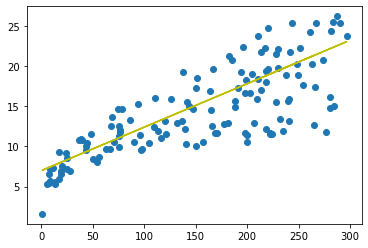

In [48]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [49]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

131   -7.100503
15     5.967117
161    2.159782
98     4.417452
152    0.060975
         ...   
192   -1.935318
157   -4.132832
49    -0.533179
158   -0.269961
20     0.457443
Name: Sales, Length: 134, dtype: float64

In [50]:
y_train_pred

array([19.80050342, 16.43288258, 11.14021774, 20.98254798, 16.53902536,
       16.61139543, 20.21060051, 10.69152327, 13.57667694, 10.41169232,
       10.30554954, 11.33320461, 16.2254217 ,  7.3817985 , 20.54832753,
       18.45924469,  8.83884935,  7.91251238, 12.30296362,  9.41780995,
       10.60950386,  7.6375061 , 12.84332685, 15.54514299, 17.17588202,
       12.60209326, 14.88416297, 10.64810123, 17.50878437, 10.62880254,
       18.98995857, 17.17105735, 19.11057537,  7.26600638, 12.34638566,
       14.99513042, 17.46536232, 18.31932921,  8.78577796,  9.0849076 ,
       17.61010247,  7.41074653, 15.92629205, 13.89992995, 16.09515556,
       11.64680827, 19.88252284, 10.01124457, 13.72141709, 10.77836737,
       17.54738174, 15.8153246 , 14.94205903, 18.20353709,  8.2164667 ,
       14.22800762, 17.73554394, 13.65869636, 20.68824301, 13.35956672,
       19.67988662, 15.13022123, 16.06620753, 16.64516813, 14.1122155 ,
        7.64233077,  9.08008293, 11.709529  , 18.58951082, 16.77

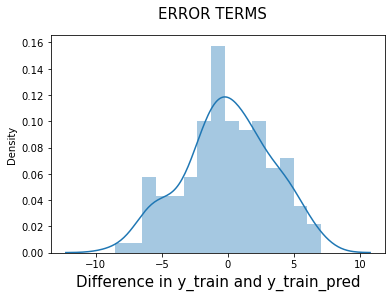

In [51]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('ERROR TERMS', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()
     

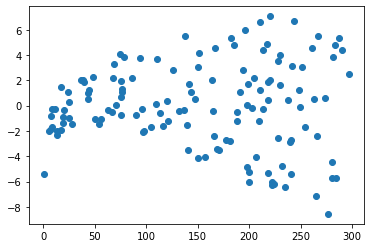

In [52]:
plt.scatter(X_train, res)
plt.show()

In [53]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)
     

In [54]:
y_pred

array([12.65998932, 17.44606363, 15.92629205,  8.52524569, 16.60174609,
       13.48500818, 19.32768559, 18.49784206,  7.82084362, 16.3267398 ,
       12.81920349, 10.33449757,  7.90768771, 11.36697731, 16.0710322 ,
       14.89381231,  7.86909034,  7.20328565, 10.19458209, 12.1871715 ,
       17.64387517, 18.57503681, 10.8748608 , 11.84944448,  8.84849869,
       11.55031483, 21.17071018,  8.29848612,  9.16210235,  8.38533021,
       18.45924469, 20.80403513, 10.34414691,  7.42039587, 20.36499   ,
       17.89958277, 15.2701367 , 11.62268491, 17.39781692, 11.21258782,
        8.24059006, 13.73589111, 10.69152327, 11.26565921, 18.57986148,
       13.52843023, 11.96041193, 13.33061869,  9.77966033, 15.48242226,
        9.88097843, 17.96712818, 15.45347423, 12.30296362, 19.68953597,
       21.13693747, 21.0307947 , 12.94464495, 13.24859927, 16.98289515,
       13.72624176, 15.54514299, 17.36404422, 16.89605106, 15.32803276,
       10.54678312])

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [56]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.144007673997822

In [57]:
r2 = r2_score(y_test, y_pred)
r2
     

0.5892621982709267

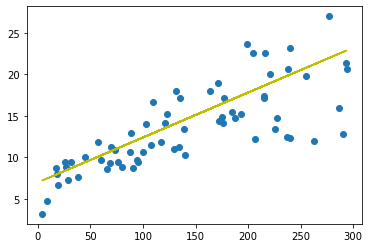

In [58]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()